# Cristina Priolo SBA 23037


# Characterization of the Dataset:

In order to analyze the dataset, I need to import it with the help of the libraries:

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
aps_df= pd.read_csv("aps_failure_set.csv")

Now that I have imported the dataset, I start analyzing it to find the specifications.

I need to see what are:

- The info of the dataset. 
- The description of the dataset.
- The number of rows and columns. 
- The number of object integers and floats in the dataset.

In [3]:
aps_df.shape

(60000, 171)

In [4]:
aps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
aps_df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [6]:
print("The data set has {} rows and {} columns".format(aps_df.shape[0], aps_df.shape[1]))
display(aps_df.describe())
display(aps_df.head())
display(aps_df.dtypes.value_counts())

The data set has 60000 rows and 171 columns


,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


object    170
int64       1
dtype: int64

From the analisis above I can say that **<span style="color: red;">the characterizations of the data set are:</span>**  

- **Size:** 6000 rows and 171 columns
- **Number of attributes/ features:** 171 ( due that are the number of columns and the rows are the     attributes)
- **Number of Observations:** 6000 ( due that are the number of rows and the rows are the Observation

# <header style="color:Darkgreen;"> Checking for duplicate: </header> 
After I will check if there are any duplicate in the dataset and for doing this I am using the duplicated().sum() function: 

In [7]:
aps_df.duplicated().sum() 

0

**<span style="color: red;"> The duplicate are 0 </span>**

I have noticed that some name columns don't have the full name, like for example "am_0". 

I will rename this column to be aligned with the others  using the rename function: 

In [8]:
aps_df.rename(columns={'am_0':'am_000'}, inplace=True)

# Data Preparation/Evaluation methods and EDA:

I want to check if there are any missing values in each column of the dataset. 

For this reason, I am using the function isnull: 

In [9]:
aps_df.isnull().sum()

class     0
aa_000    0
ab_000    0
ac_000    0
ad_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 171, dtype: int64

and I will sum up all the values:

In [10]:
aps_df.isnull().sum().sum()

0

From here it looks like that none missing value are in the dataset but I want to check deeper so I will check in the columns with the following function: 

In [11]:
aps_df.describe(include ="object")

,class,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,30,2062,1887,334,419,155,618,2423,7880,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,na,0,na,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,46329,8752,14861,55543,55476,59133,58587,56181,46894,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


I can identify that "ab_000 and "ad_000" have "na" in their columns so it means that they are categorical values and not numerical. For this reason, I want to explore each column that I have spotted with "na" if there are unique to understand the scale of the data:

In [12]:
aps_df["ab_000"].unique()

array(['na', '0', '2', '4', '6', '8', '18', '10', '12', '16', '204', '24',
       '134', '90', '26', '14', '34', '52', '20', '22', '30', '36', '100',
       '48', '58', '32', '28', '44', '46', '68'], dtype=object)

Now that I checked for the missing value in the same column, I am using the sum() function:

In [13]:
aps_df["ab_000"].isnull().sum()

0

I will repeat the process for the column "ad_000":

In [14]:
aps_df["ad_000"].unique()

array(['280', 'na', '100', ..., '5286', '3608', '194868'], dtype=object)

In [15]:
aps_df["ad_000"].isnull().sum()

0

I will identify now the missing values with the following: 

In [16]:
missing_values=["NA","N/A","-","NaN","missing","na","?"]

In [17]:
aps_df=pd.read_csv("aps_failure_set.csv", na_values=missing_values)

I will use the sum() function for the missing value and display them:

In [18]:
missing_values=aps_df.isnull().sum()

In [19]:
print(missing_values)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64


# <header style="color:Darkgreen;"> Visualization of missing data: </header>

Addind missingno library I can show the missing value with a barplot: 

In [20]:
import missingno as msno

<Axes: >

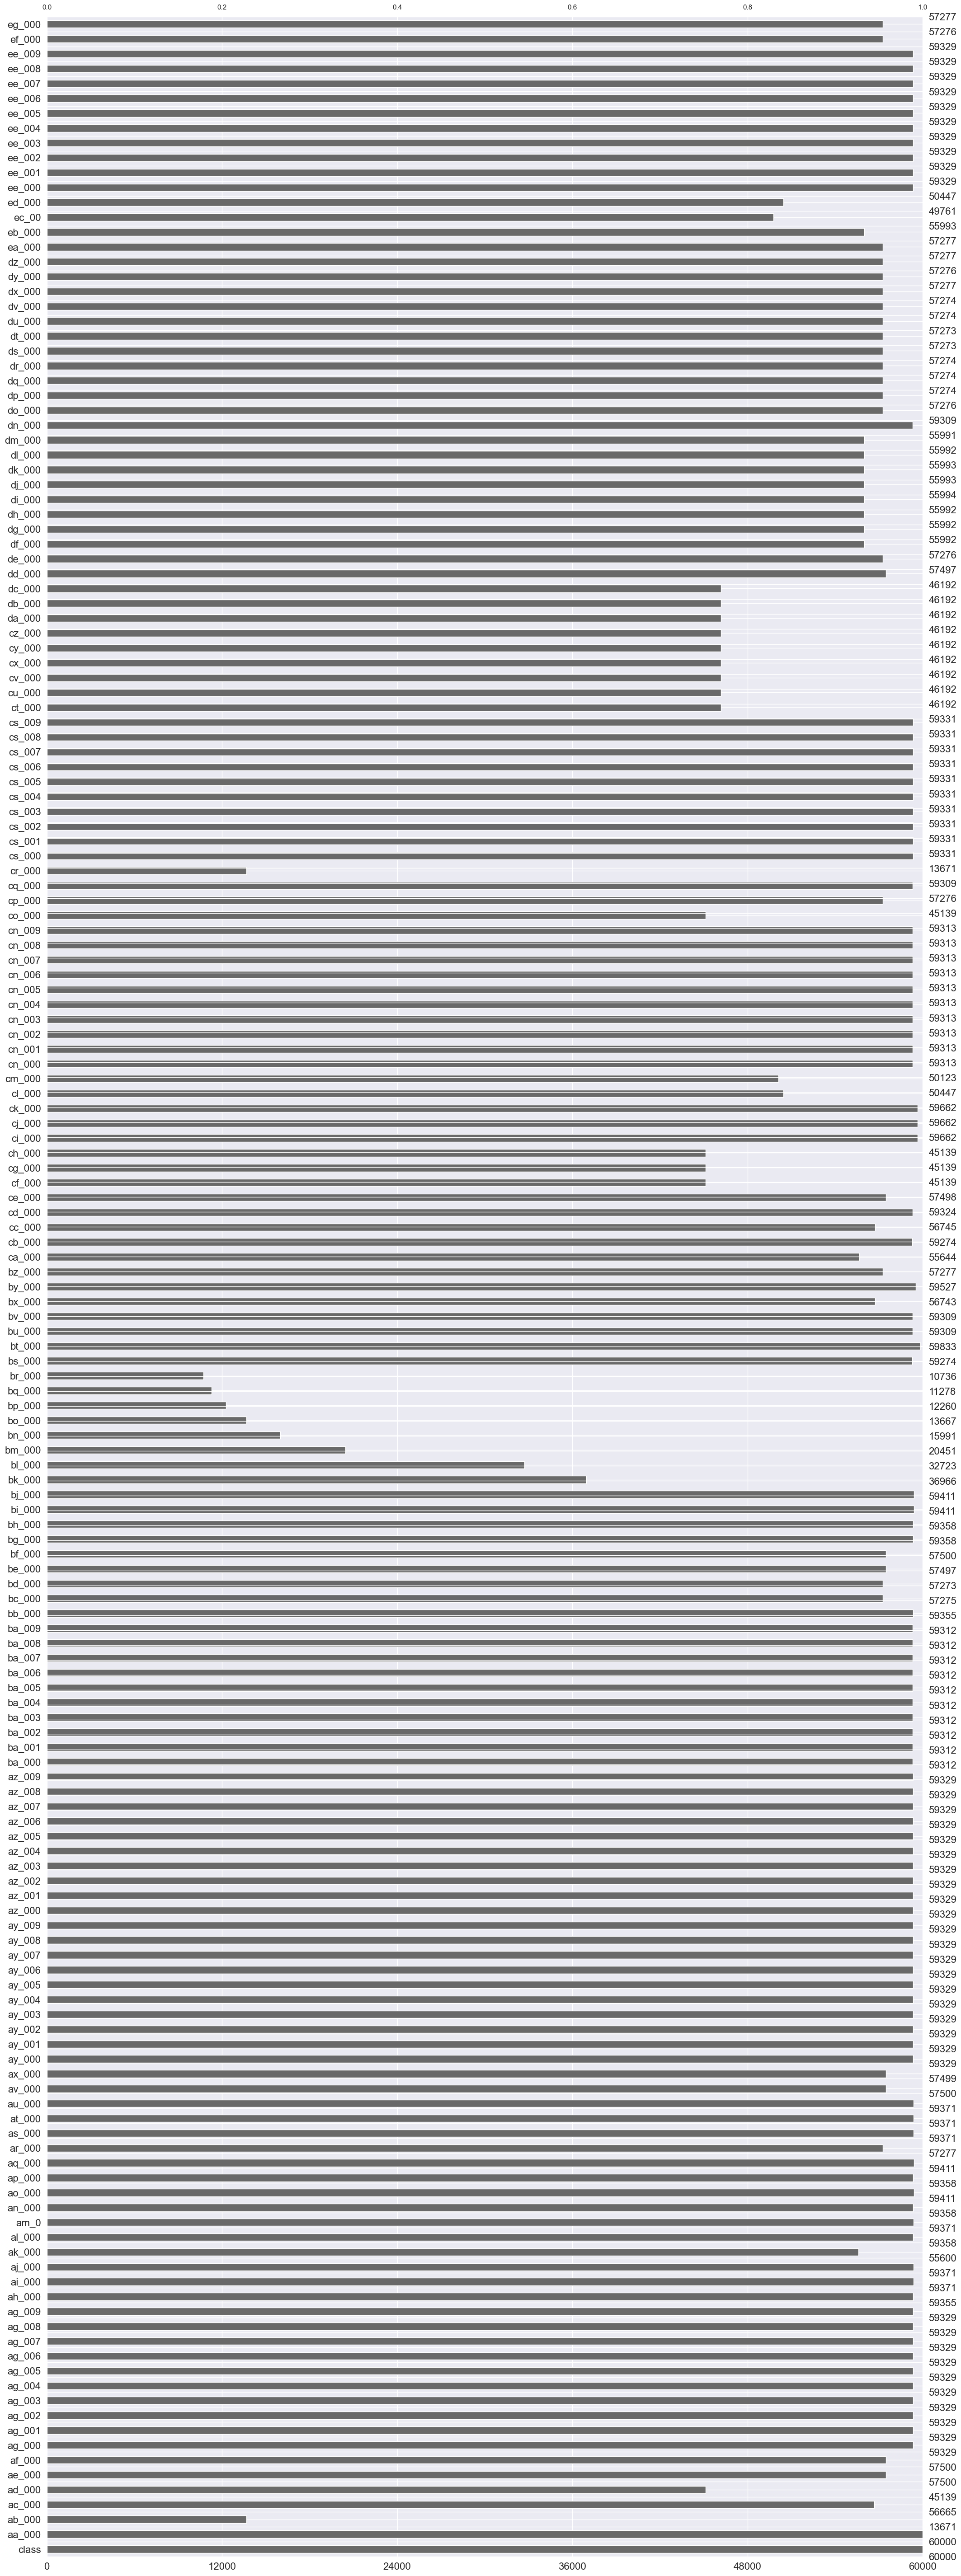

In [21]:
msno.bar(aps_df)

I can see from the graphic that there are lots of missing data. 

I want to remove the columns where more than 10 % of the values are missing.

The reason behind deciding the amount of 10 % is because in class we have seen that if there is more than 10 % missing data, we need to have a good reason to not drop it. 

To do so I have used the following function:

In [22]:
aps_df=aps_df.drop(aps_df.columns[aps_df.isnull().mean()>10])

# <header style="color:Darkgreen;"> Impute Data: </head>
I need to fill the missing values, so I will use the median (I have added an ignore warning because I was having one when I did the median).

*To impute, I will do the following*: 

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
aps_df.fillna(aps_df.median(),inplace=True)


Now I can describe the dataset with the mediam into place: 

In [25]:
aps_df.describe

<bound method NDFrame.describe of       class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     0.0  0.000000e+00   126.0     0.0     0.0     0.0   
2       neg   41040     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    

# <header style="color:Darkgreen;"> Visualization: </header>

I wanted to see if there are outliners, so I took some random features and display them in a Boxplot: 

<Axes: xlabel='aa_000'>

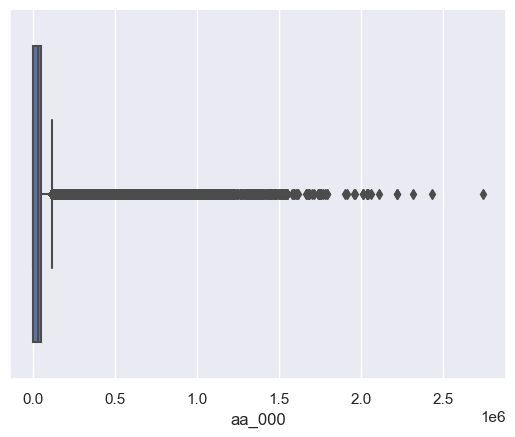

In [26]:
sns.boxplot(x=aps_df['aa_000'])

<Axes: xlabel='ad_000'>

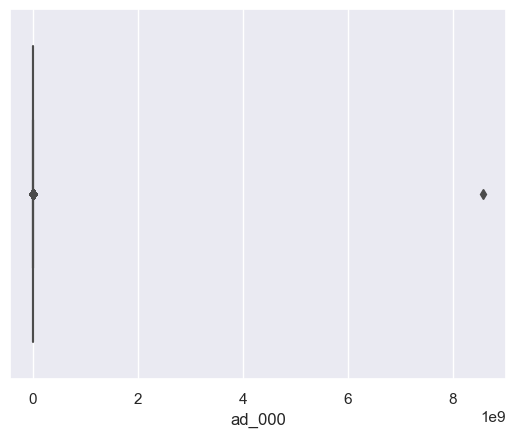

In [27]:
sns.boxplot(x=aps_df['ad_000'])

<Axes: xlabel='an_000'>

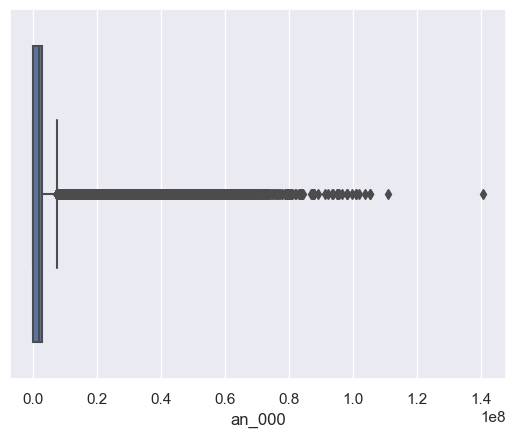

In [28]:
sns.boxplot(x=aps_df['an_000'])

To see if there are correlation between two variables, I want to use a subplot: 

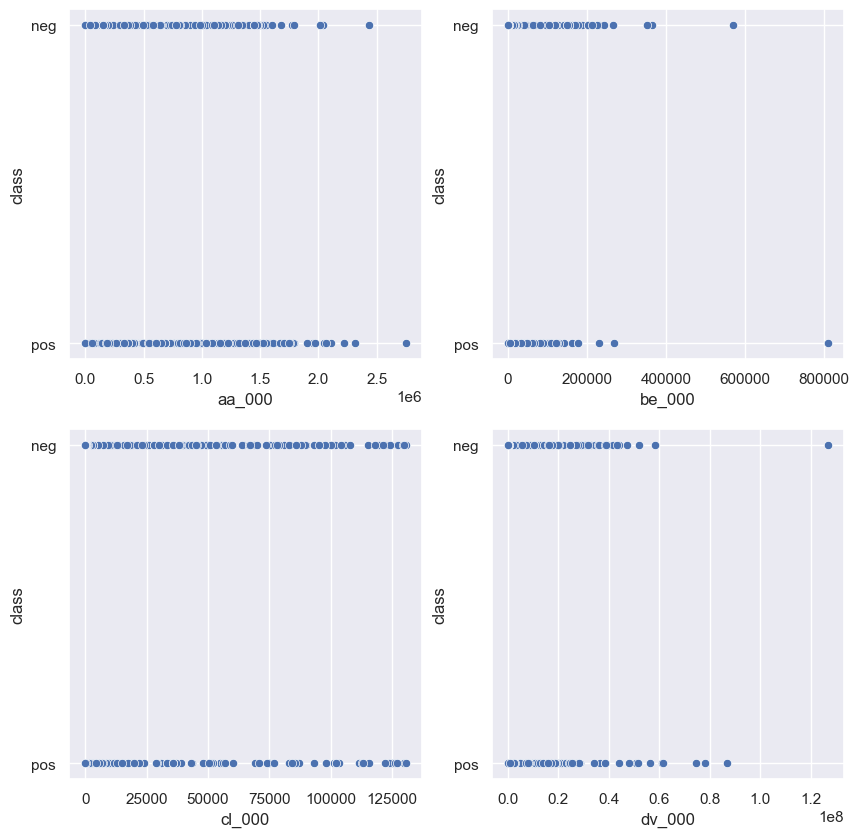

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

sns.scatterplot(data=aps_df, x='aa_000',   y='class', ax=axs[0][0])
sns.scatterplot(data=aps_df, x='be_000',  y='class', ax=axs[0][1])
sns.scatterplot(data=aps_df, x='cl_000', y='class', ax=axs[1][0])
sns.scatterplot(data=aps_df, x='dv_000', y='class', ax=axs[1][1])


print('')

Thinking of the scenario, I wanted to show how many negative and positive values, are present in the feature "class". I have identified the class with the "value_counts". Thanks to this formula I was able to highlite:

- 0 that stand for the negative values 

- 1 that standes for the positive values.

I create an histogram to visualize it: 

In [30]:
print(aps_df["class"].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64


In [31]:
class_counts = aps_df["class"].value_counts()
print(class_counts)


neg    59000
pos     1000
Name: class, dtype: int64


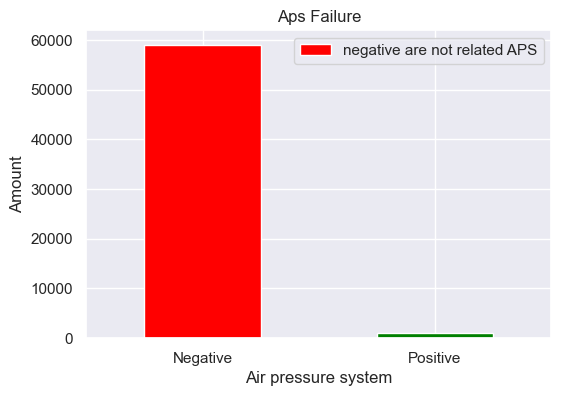

In [32]:
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Air pressure system')
plt.ylabel('Amount')
plt.title('Aps Failure')
plt.xticks(range(len(class_counts.index)), ['Negative', 'Positive'], rotation=0)
plt.legend(['negative are not related APS'])
plt.show()

# PCA:

I need encode  the "Class" feature from a category value to a numerical value. I am using the function LabelEncoder. Without this If i try to apply PCA, I won't be able to continue. 

In [33]:
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()
aps_df["class"]=L_encoder.fit_transform(aps_df["class"])
aps_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


We can see that the target variable, that is "class", is included and this needs to be dropped. To remove it, we use the drop function:

In [34]:
aps_no_label = aps_df.drop(columns=["class"])

You can see that it is dropped because it is not part of the following: 

In [35]:
aps_no_label.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


To establish how many components I need to retain to have the 99.5 % variance data:

1- I will import the Sklearn library.

2- I will use the function to calculate the component and their corrispondance variance based on the data.

*Following the steps:*

In [36]:
from sklearn.decomposition import PCA

(0.0, 10.0)

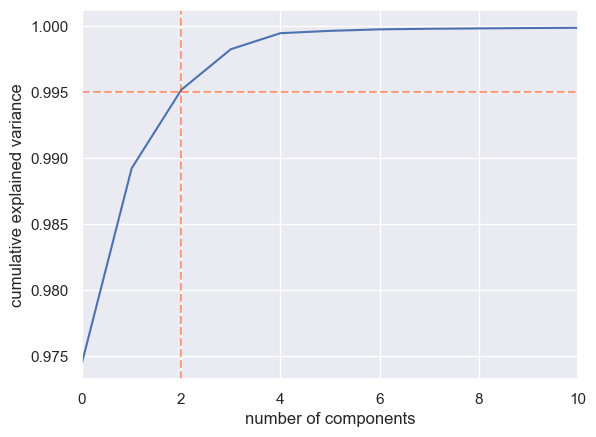

In [37]:
pca = PCA().fit(aps_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');
plt.axhline(0.9950,color= "orangered",alpha=.5,ls="--")
plt.axvline(2,color= "orangered",alpha=.5,ls="--");
plt.xlim(0,10)

**<span style="color: red;">Results: </span>By retaining 2 principal components,I can achieve the 99.5% of variance.**

This information is crucial to decide how many principal compontent we need to keep during the PCA stage.

After I need to reduce the dimentionality of the dataset in the two dimentions and after showing and calling the components

In [38]:
pca = PCA(2)
projected = pca.fit_transform(aps_no_label)

In [39]:
projected.shape

(60000, 2)

In [40]:
projected

array([[ 1.79449446e+09,  3.18846158e+05],
       [-3.36192455e+08, -5.37378138e+06],
       [-3.36192048e+08, -5.62720424e+06],
       ...,
       [ 1.79451386e+09, -1.43241544e+06],
       [ 1.79444580e+09,  9.85349724e+05],
       [-3.36275999e+08, -4.90353979e+06]])

To see how this looks like I transform into a dataframe where I call the principal component: C1 and C2 

In [41]:
aps_pca = pd.DataFrame(projected, columns =['C1', 'C2'])

I will add again my target variable to what my principal components refer to:

In [42]:
aps_pca["class"] = aps_df["class"]

In [43]:
aps_pca.head()

,C1,C2,class
0,1.794494e+09,3.188462e+05,0
1,-3.361925e+08,-5.373781e+06,0
2,-3.361920e+08,-5.627204e+06,0
3,-3.361691e+08,-6.271391e+06,0
4,-3.362450e+08,-4.904796e+06,0


# <header style="color:Darkgreen;"> Curse of Dimentionality: </header>

The curse of dimentionality is when the data set doesn't have enough observations but enough features. To extract the pattern in the data the features need to be reduced to have more observations. EDA and PCA are essential stages to achieve a clear and reliable dataset. In this specific dataset after the initial observation and cleaning the missing values have been spotted and dropped. The median has been imputed and feature class dropped to perform PCA. To have 99.5% of the variance in the data. This is a necessary step for training the data and applying machine learning models. 

# Conclusions:

In the early stage of the assignment, the dataset needed to be analyzed. With the help of the library the dataset has been imported and thanks to the function it was clear what the size, the charactarization, the number of observations and features of it. After this initial stage, it has been explored if there are any missing values in it. At the beginning the Null function showed that no missing values were there but after a deeper analysis of the feature it has been spotted for some columns the categorical value "NA". "Na" is not a value and it could compromise our analysis. To solve this issue columns with the categorical value have been analyzed with the "unique function" and summed up. This process is part of the EDA stage.

**To do the visualization of the missing data:**


- **<span style="color: red;">  Barplot </span>&rarr;** thanks to the library Missingno, the amount of the missing values are shown with a barplot.

The columns with more than 10 % missing values have been dropped and imputed with the median.

In the stage of EDA, it could be noticed some visualization. 

**To do so it has been taken into consideration the following graphics**:

- **<span style="color: red;"> BoxPlot </span> &rarr;** The boxplot shows the outliners of 3 random features in the dataset.


- **<span style="color: red;">  Subplot </span> &rarr;** The subplot shows the comparization between different features. In this case, it has been taken into consideration random features.


- **<span style="color: red;">  Histogram </span> &rarr;** To show the different amounts of the negative and positive values in the target variable class. This was necessary to have a general overview of what is and isn't connected to the component failures for a specific component of the APS system.


Subsequently, the column class has been labelled from a categorical value to a numerical value to perfom PCA,

Performing PCA helped to understand how many features we need to retain to have the 99.5 % variance of data. The graphic showed 2 number of feature to have these results that have been showed in a graphic with array. This helps us to find the pattern into the data itself.


Those steps are necessary to move forward in the analysis.

# References:

- Kallepalliravi. “Python: Finding Missing Values in a Data Frame.” Medium, 19 Aug. 2020, medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd.

- Matplotlib. “Matplotlib: Python Plotting — Matplotlib 3.1.1 Documentation.” Matplotlib.org, 2012, matplotlib.org/.

- Numpy. “NumPy.” Numpy.org, 2009, numpy.org/.

- Pandas. “Python Data Analysis Library — Pandas: Python Data Analysis Library.” Pydata.org, 2018, pandas.pydata.org/.

- scikit-learn. “Scikit-Learn: Machine Learning in Python.” Scikit-Learn.org, 2019, scikit-learn.org/stable/.

- seaborn. “Seaborn: Statistical Data Visualization — Seaborn 0.9.0 Documentation.” Pydata.org, 2012, seaborn.pydata.org/.

- Riederer, Yihui Xie, Christophe Dervieux, Emily. 5.1 Font Color | R Markdown Cookbook. Bookdown.org, bookdown.org/yihui/rmarkdown-cookbook/font-color.html.

- “How to Disable Python Warnings?” Stack Overflow, stackoverflow.com/questions/14463277/how-to-disable-python-warnings. 

- UrmishaEduWorld. “Drop Columns Where Percentage of Missing Values Is Greater than 50% in Python.” Www.youtube.com, UrmishaEduWorld, 24 May 2022, www.youtube.com/watch?v=ziv2o_POO0A. Accessed 29 Oct. 2023. 

- “Working with Missing Data in Pandas.” GeeksforGeeks, 3 Jan. 2019, www.geeksforgeeks.org/working-with-missing-data-in-pandas/. 

- “How to Plot a Histogram with Various Variables in Matplotlib in Python?” GeeksforGeeks, 2 Jan. 2022, www.geeksforgeeks.org/how-to-plot-a-histogram-with-various-variables-in-matplotlib-in-python/. 
- “Pandas.DataFrame.rename — Pandas 1.4.2 Documentation.” Pandas.pydata.org, pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html.

- Fessel, Kimberly . “Add a Baseline to a Matplotlib Figure || Horizontal and Vertical Lines || Matplotlib Tips.” Www.youtube.com, 30 Nov. 2020, www.youtube.com/watch?v=xKeu1W2mn64. Accessed 31 Oct. 2023.
- “How to Do Arrows in Markdown.” Reimbar.org, 7 Aug. 2019, reimbar.org/dev/arrows/. Accessed 1 Nov. 2023.
-McDonald, Andy. “Missingno Python Library | Visualising Missing Values in Data prior to Machine Learning.” Www.youtube.com, 8 Sept. 2021, www.youtube.com/watch?v=Wdvwer7h-8w.
-“Format Text in Jupyter Notebook with Markdown.” Earth Data Science - Earth Lab, 29 Aug. 2019, www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/.